<h1>A Notebook for the IBM Applied Data Science Capstone Course 9</h1>

<p1>Here I will do two things.  First analyize New Jersey Congressional District Five(NJ5) using US Census Demographic ans New Jersey State Elections Results.  Second I will see if I can take a short cut to gathering data from the government by using Foursquare location data to analyize the district as well.  For both parts I will review the data and use KMeans Clustering</p1>

In [44]:
#Here I import the modules I need to run this analysis 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Modules Imported')

Matplotlib version:  3.0.2
Modules Imported


<h2>The data imports</h2>

In [45]:
# The code was removed by Watson Studio for sharing.

,Name,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
0,United States,United States,327167434,0.224,0.16,0.508,0.134,0.013,0.059,0.002,...,193500,0.854,0.213,0.309,0.087,0.102,13443,26.4,31177,87.4


In [46]:
#Here I get data for NJ5 this includes voting data from the State of New Jersey and 
#US Census population Estimates for each communitiy
#There are a total of 79 communities listed in the New Jersey State election data.
#The Wikipedia article on NJ5 also shows 79 communities and the names are the same

body = client_69a90b0368484683a96fb7f5d0b8eed7.get_object(Bucket='datasciencecapstoneprojectcourse9-donotdelete-pr-ubqbzttbbqeol7',Key='MainData1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


df_nj5_main = pd.read_csv(body)
df_nj5_main.head()

,Name,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
0,Allamuchy Twp,Warren County,4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,925,0.20161,399,0.08697,1247,0.27180,1382,0.30122,844,0.18396
1,Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.0,0.117,0.0,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
2,Alpine,Bergen County,1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422,0.22688,233,0.12527,317,0.17043,392,0.21075,260,0.13978
3,Andover Boro,Sussex County,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,0.21314,60,0.10657,119,0.21137,145,0.25755,80,0.14210
4,Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.0,0.026,0.0,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286


In [47]:
df_nj5_main.set_index('Name',inplace=True)

#df_nj5_county.set_index('County',inplace=True)


In [48]:
df_nj5_main

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Allamuchy Twp,Warren County,4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,925,0.20161,399,0.08697,1247,0.27180,1382,0.30122,844,0.18396
Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
Alpine,Bergen County,1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422,0.22688,233,0.12527,317,0.17043,392,0.21075,260,0.13978
Andover Boro,Sussex County,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,0.21314,60,0.10657,119,0.21137,145,0.25755,80,0.14210
Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286
Belvidere,Warren County,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,494,0.19177,219,0.08502,526,0.20419,651,0.25272,440,0.17081
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
Blairstown township,Warren County,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,...,997,0.17406,447,0.07804,1495,0.26100,1790,0.31250,1144,0.19972
Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,...,2184,0.25960,1185,0.14085,851,0.10115,1017,0.12088,853,0.10139


<p1>Saw issue in data.  Paramus is in Bergen county so need to fix it</p1>

In [49]:
df_nj5_main.at['Paramus borough','County']='Bergen County'

In [50]:
#looks good now
df_nj5_main

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Allamuchy Twp,Warren County,4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,925,0.20161,399,0.08697,1247,0.27180,1382,0.30122,844,0.18396
Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
Alpine,Bergen County,1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422,0.22688,233,0.12527,317,0.17043,392,0.21075,260,0.13978
Andover Boro,Sussex County,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,0.21314,60,0.10657,119,0.21137,145,0.25755,80,0.14210
Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286
Belvidere,Warren County,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,494,0.19177,219,0.08502,526,0.20419,651,0.25272,440,0.17081
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
Blairstown township,Warren County,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,...,997,0.17406,447,0.07804,1495,0.26100,1790,0.31250,1144,0.19972
Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,...,2184,0.25960,1185,0.14085,851,0.10115,1017,0.12088,853,0.10139


In [51]:
#Here I get data for NJ5 which is actually the same as the main data above but..
#I cleaned of the csv so that it only has the communities with 5,000 or more population
#The US Census data I sourced did not have demograhics such as a persons age for communities less than 5,000 people
#I removed 30 communities in nj5 which are less than 5,000
#So this data is a subset of main data just with towns of 5,000 people or more 49 communities total
body = client_69a90b0368484683a96fb7f5d0b8eed7.get_object(Bucket='datasciencecapstoneprojectcourse9-donotdelete-pr-ubqbzttbbqeol7',Key='MainData49Only.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



df_nj5_49 = pd.read_csv(body)
df_nj5_49.head()

,Name,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
0,Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.0,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
1,Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.0,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286
2,Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.0,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
3,Blairstown township,Warren County,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.0,...,997,0.17406,447,0.07804,1495,0.26100,1790,0.31250,1144,0.19972
4,Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.0,...,2184,0.25960,1185,0.14085,851,0.10115,1017,0.12088,853,0.10139


In [52]:
#In the USA Communities are grouped into counties and counties into states
#Therefore it is useful to look at NJ5 in terms of counties - or particular groups of communities as well
#Here I import some county totals to help summerize the data story for NJ5

body = client_69a90b0368484683a96fb7f5d0b8eed7.get_object(Bucket='datasciencecapstoneprojectcourse9-donotdelete-pr-ubqbzttbbqeol7',Key='CountyTotals.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_nj5_county = pd.read_csv(body)
df_nj5_county.head()

,County,County_Population_2018,Democrat_2018,Democrat_2016,Democrat_2014,Republican_2018,Republican_2016,Republican_2014,Democrat_Total,Republican_Total
0,Bergen County Total,546413,133894,135681,66771,82869,101859,71318,336346,256046
1,Passaic County Total,38784,7229,7449,3233,8487,9962,6387,17911,24836
2,Sussex County Total,94760,17171,17880,7128,21946,28117,16310,42179,66373
3,Warren County Total,66816,11252,11577,4676,14953,17752,10663,27505,43368
4,County Totals,746773,169546,172587,81808,128255,157690,104678,423941,390623


In [53]:
df_nj5_county['Republican Average for County']=df_nj5_county['Republican_Total']/3

In [54]:
df_nj5_county['Democrat Average for County']=df_nj5_county['Democrat_Total']/3

In [55]:
df_nj5_county

,County,County_Population_2018,Democrat_2018,Democrat_2016,Democrat_2014,Republican_2018,Republican_2016,Republican_2014,Democrat_Total,Republican_Total,Republican Average for County,Democrat Average for County
0,Bergen County Total,546413,133894,135681,66771,82869,101859,71318,336346,256046,85348.666667,112115.333333
1,Passaic County Total,38784,7229,7449,3233,8487,9962,6387,17911,24836,8278.666667,5970.333333
2,Sussex County Total,94760,17171,17880,7128,21946,28117,16310,42179,66373,22124.333333,14059.666667
3,Warren County Total,66816,11252,11577,4676,14953,17752,10663,27505,43368,14456.000000,9168.333333
4,County Totals,746773,169546,172587,81808,128255,157690,104678,423941,390623,130207.666667,141313.666667


<h2>The Analysis - Visualization</h2>

In [56]:
#Now we have the data we can Visualize NJ5 by Starting with Counties
#First we ready the data 


df_nj5_county.set_index('County',inplace=True)
df_nj5_county2 =df_nj5_county.drop('County Totals')


In [57]:
#Notice Bergen County leaves all others looking quite small
df_nj5_county2

,County_Population_2018,Democrat_2018,Democrat_2016,Democrat_2014,Republican_2018,Republican_2016,Republican_2014,Democrat_Total,Republican_Total,Republican Average for County,Democrat Average for County
County,,,,,,,,,,,
Bergen County Total,546413,133894,135681,66771,82869,101859,71318,336346,256046,85348.666667,112115.333333
Passaic County Total,38784,7229,7449,3233,8487,9962,6387,17911,24836,8278.666667,5970.333333
Sussex County Total,94760,17171,17880,7128,21946,28117,16310,42179,66373,22124.333333,14059.666667
Warren County Total,66816,11252,11577,4676,14953,17752,10663,27505,43368,14456.000000,9168.333333


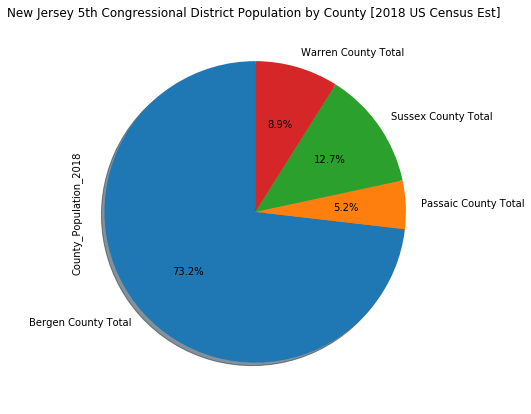

In [152]:
#We can see a pie chart to help understand just how big Bergen County is

# autopct create %, start angle represent starting point
df_nj5_county2['County_Population_2018'].plot(kind='pie',
                            figsize=(6, 7),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('New Jersey 5th Congressional District Population by County [2018 US Census Est]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

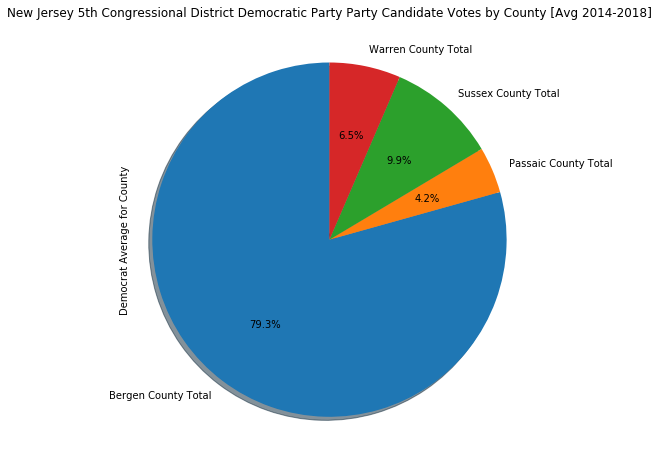

In [59]:
#Now let us understand which counties the Democratic Party are stronger in.
#Here is votes for the Democratic Party Canditiate for Congress in NJ5 for average by county 


# autopct create %, start angle represent starting point
df_nj5_county2['Democrat Average for County'].plot(kind='pie',
                            figsize=(7, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('New Jersey 5th Congressional District Democratic Party Party Candidate Votes by County [Avg 2014-2018]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()



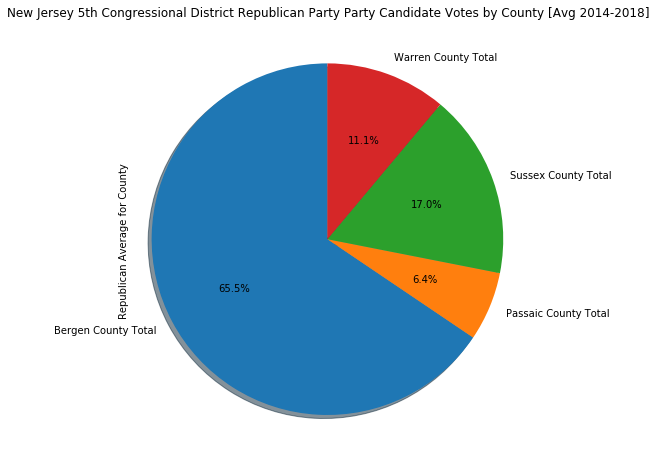

In [60]:
#Now let us understand which counties the Republican Party are stronger in.
#Here is votes for the REpublican Party Canditiate for Congress in NJ5 for 2018 by county 


# autopct create %, start angle represent starting point
df_nj5_county2['Republican Average for County'].plot(kind='pie',
                            figsize=(7, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('New Jersey 5th Congressional District Republican Party Party Candidate Votes by County [Avg 2014-2018]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()



<p1>So we can clearly see three things here:</p>
 <ol>
    <li>Bergen County is the biggest county by far</li>
    <li>The Democrates are stronger in Bergen County than in Warren, Sussex, and Passaic</li>
    <li>The Republicans show weakness in Bergen County and strength in Warren, Sussex, and Passaic</li>

<p1>Is it a big city in Bergen County which causes this? No.  Here you can see the communities by population</p1>

In [61]:
#Now we can look at what size the communities are
#the town of Walpack has 11 people only.  This is quite small and no other towns are nearly that small so droping it for now



#df_nj5_main.set_index('Name',inplace=True)
df_nj5_main2 =df_nj5_main.drop('Walpack')
df_nj5_main2.head()

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Allamuchy Twp,Warren County,4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,925,0.20161,399,0.08697,1247,0.27180,1382,0.30122,844,0.18396
Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.0,0.117,0.0,0.018,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
Alpine,Bergen County,1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422,0.22688,233,0.12527,317,0.17043,392,0.21075,260,0.13978
Andover Boro,Sussex County,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,0.21314,60,0.10657,119,0.21137,145,0.25755,80,0.14210
Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.0,0.026,0.0,0.042,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286


In [62]:
#I don't see a big city here.  We should try to bar chart this maybe
df_nj5_main2

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Allamuchy Twp,Warren County,4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,925,0.20161,399,0.08697,1247,0.27180,1382,0.30122,844,0.18396
Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,...,1612,0.23734,776,0.11425,1530,0.22527,1842,0.27120,1281,0.18860
Alpine,Bergen County,1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422,0.22688,233,0.12527,317,0.17043,392,0.21075,260,0.13978
Andover Boro,Sussex County,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,0.21314,60,0.10657,119,0.21137,145,0.25755,80,0.14210
Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,...,1281,0.21660,587,0.09926,1262,0.21339,1514,0.25600,904,0.15286
Belvidere,Warren County,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,494,0.19177,219,0.08502,526,0.20419,651,0.25272,440,0.17081
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
Blairstown township,Warren County,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,...,997,0.17406,447,0.07804,1495,0.26100,1790,0.31250,1144,0.19972
Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,...,2184,0.25960,1185,0.14085,851,0.10115,1017,0.12088,853,0.10139


In [63]:
#to make bar chart I feel it is best to make a new dataframe with just the populations along with name and county
Main_Pops=df_nj5_main2.filter(['Name','County','Population estimates July 1 2018'], axis=1)

In [64]:
Main_Pops

,County,Population estimates July 1 2018
Name,,
Allamuchy Twp,Warren County,4588
Allendale borough,Bergen County,6792
Alpine,Bergen County,1860
Andover Boro,Sussex County,563
Andover township,Bergen County,5914
Belvidere,Warren County,2576
Bergenfield borough,Bergen County,27479
Blairstown township,Warren County,5728
Bogota borough,Bergen County,8413


<p1>As you can see there are no big cities in NJ5.  The largest communities are less than 50,000 people.  We can show a bar chart of all the communities by population</p1> 

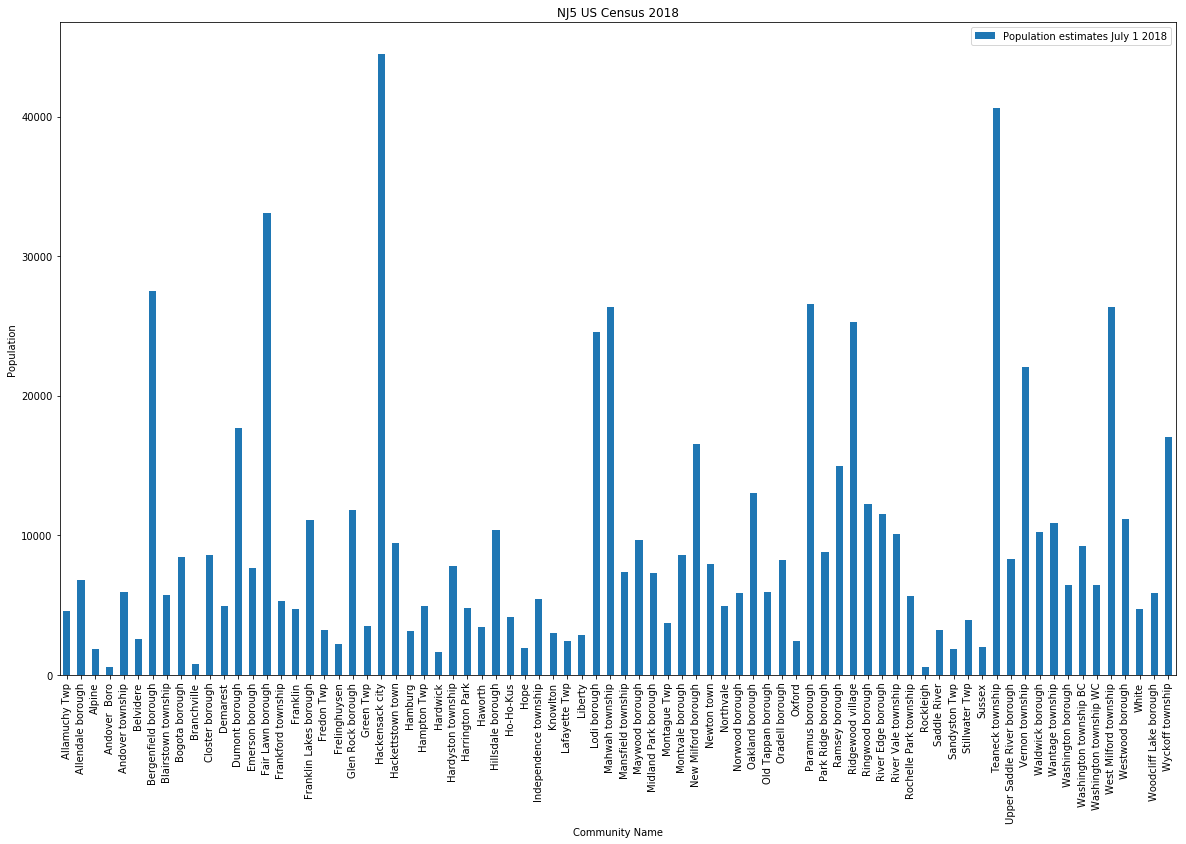

In [65]:
Main_Pops.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Community Name') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('NJ5 US Census 2018') # add title to the plot

plt.show()

<p1>I like the bar chart.  A Histogram is good too because you can see the distribution of the different sizes.</p1>

In [66]:
#We can also look to see how the population is distributed in a histogram

# np.histogram returns 2 values
count, bin_edges = np.histogram(Main_Pops['Population estimates July 1 2018'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[28 24 12  4  1  5  1  1  0  2]
[  533.   4931.9  9330.8 13729.7 18128.6 22527.5 26926.4 31325.3 35724.2
 40123.1 44522. ]


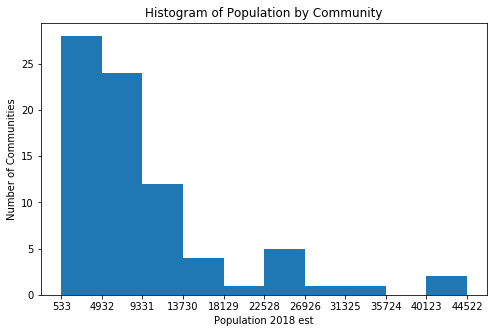

In [67]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(Main_Pops['Population estimates July 1 2018'])

Main_Pops['Population estimates July 1 2018'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Population by Community') # add a title to the histogram
plt.ylabel('Number of Communities') # add y-label
plt.xlabel('Population 2018 est') # add x-label

plt.show()

<p1>Okay now we can see there are mostly smaller sized communities in NJ5.  Most communities are less than 5,000.  There are less than 5 in the largest bucket of between 40,000-50,000</p1>

<h2>Now we can compare what NJ5 looks like against the USA as a whole.  Note the US Census Data is for Communities Above 5,ooo<h2>

<p1>Notice there are some concerns here.  First the US Census data is old.  We are due for a new Census in 2020.  Also communities with a population less than 5,000 don't have as much data availible.  So in NJ5 that means 30 out of 79 comunities don't have the detailed Census data.  This is a large concern particulary as the communities in rural areas are more often less than 5,000 than the suburban ones.  As shown above the Republicans are stronger outside of Bergen County. These counties are more rural</p1> 

In [69]:
#Now I would like to know about the USA

df_USA

,Name,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
0,United States,United States,327167434,0.224,0.16,0.508,0.134,0.013,0.059,0.002,...,193500,0.854,0.213,0.309,0.087,0.102,13443,26.4,31177,87.4


<p1>Great we know the USA data.  Now we can get the means, max, min, standard deviation and such for NJ5<p1>

In [71]:
#How does the USA Compare to the numbers for NJ5
df_desc=df_nj5_49.describe()

df_desc_final=df_desc.drop(['Democrat 2016','Democrat 2016 Per Person','Democrat 2014','Democrat 2014 Per Person','Republican 2018','Democrat 2018','Democrat 2018 Per Person','Republican 2018 Per Person','Republican 2016 Per Person','Republican 2016','Republican 2014','Republican 2014 Per Person'],axis=1)

df_desc_final

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,44.000000,49.000000,49.000000,49.000000
mean,13434.714286,0.225408,0.166286,0.511918,0.037224,0.001612,0.100857,0.000204,0.121429,0.729612,...,462502.040816,0.915531,0.238061,0.479245,0.049612,0.064143,18857.068182,33.832653,49504.163265,3414.120408
std,9378.652480,0.030791,0.028609,0.013794,0.052539,0.003061,0.082826,0.000577,0.091986,0.155072,...,185402.240064,0.031780,0.132435,0.146160,0.020561,0.038789,24207.276265,4.110524,14463.047171,2976.305876
min,5311.000000,0.169000,0.102000,0.483000,0.001000,0.000000,0.006000,0.000000,0.016000,0.267000,...,206300.000000,0.842000,0.042000,0.223000,0.019000,0.009000,1673.000000,25.800000,27919.000000,163.600000
25%,7384.000000,0.202000,0.146000,0.503000,0.011000,0.000000,0.036000,0.000000,0.067000,0.623000,...,303600.000000,0.903000,0.138000,0.351000,0.034000,0.036000,6879.500000,31.100000,39338.000000,1129.100000
50%,9694.000000,0.227000,0.166000,0.510000,0.023000,0.000000,0.085000,0.000000,0.091000,0.772000,...,434000.000000,0.921000,0.217000,0.494000,0.044000,0.059000,12203.000000,34.100000,45910.000000,2621.900000
75%,16558.000000,0.243000,0.188000,0.522000,0.039000,0.002000,0.135000,0.000000,0.166000,0.849000,...,580200.000000,0.936000,0.340000,0.587000,0.065000,0.072000,23635.250000,36.700000,57181.000000,4656.500000
max,44522.000000,0.304000,0.229000,0.546000,0.276000,0.018000,0.360000,0.002000,0.445000,0.929000,...,975000.000000,0.975000,0.546000,0.761000,0.120000,0.171000,144501.000000,42.700000,82266.000000,10702.000000


In [72]:
shpe=df_desc_final.shape
print(shpe)

(8, 23)


<h1>There are 23 demographic data points which were downloaded for each community of 5,000 persons or more in NJ5</h1>

<p1>Generally compared against the USA as a whole the population of NJ5 is </p1>
<ul>
  <li>Well educated with one community haveing over 75% of the 25 year and older population having at least a Bachelor Degree.</li>
  <li>High income</li>
  <li>Higher percentage of Asian and White ethnic groups</li>
  <li>Takes longer to get to work</li>
</ul>

In [73]:
#I would like to focus on the mean to compare directly against the USA as a whole
df_desc_mean=df_desc_final.filter(['mean'], axis=0)
df_desc_mean

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
mean,13434.714286,0.225408,0.166286,0.511918,0.037224,0.001612,0.100857,0.000204,0.121429,0.729612,...,462502.040816,0.915531,0.238061,0.479245,0.049612,0.064143,18857.068182,33.832653,49504.163265,3414.120408


In [74]:
df_USA2 = df_USA.drop(['Name','County'], axis=1)
df_USA2

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
0,327167434,0.224,0.16,0.508,0.134,0.013,0.059,0.002,0.183,0.604,...,193500,0.854,0.213,0.309,0.087,0.102,13443,26.4,31177,87.4


In [75]:
Mean_Combo= [df_desc_mean,df_USA2]

In [76]:
result = pd.concat(Mean_Combo)

In [78]:
#okay here we can see NJ5 (showing in the mean row) and USA means (shown in the 0 row)
result

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
mean,1.343471e+04,0.225408,0.166286,0.511918,0.037224,0.001612,0.100857,0.000204,0.121429,0.729612,...,462502.040816,0.915531,0.238061,0.479245,0.049612,0.064143,18857.068182,33.832653,49504.163265,3414.120408
0,3.271674e+08,0.224000,0.160000,0.508000,0.134000,0.013000,0.059000,0.002000,0.183000,0.604000,...,193500.000000,0.854000,0.213000,0.309000,0.087000,0.102000,13443.000000,26.400000,31177.000000,87.400000


<p1>We can see from the above NJ5 appears more affluent than the USA as a whole.  The numbers really show a well educated area with high house prices, high per capita income, and better than average retail sales.  The ethinic make up shows NJ5 as much higher in the Asian and White categories than the USA in general.  We should take a closer look here.</p1>

In [79]:
result_ethnic = result.filter(['Black or African American alone percent','Hispanic or Latino percent','American Indian and Alaska Native alone percent','Asian alone percent','White alone not Hispanic or Latino percent'], axis=1)

In [80]:
result_ethnic

,Black or African American alone percent,Hispanic or Latino percent,American Indian and Alaska Native alone percent,Asian alone percent,White alone not Hispanic or Latino percent
mean,0.037224,0.121429,0.001612,0.100857,0.729612
0,0.134000,0.183000,0.013000,0.059000,0.604000


In [81]:
idx_rename ={'mean':'NJ5',0:'USA'}

In [82]:
result_ethnic_rename=result_ethnic.rename(index=idx_rename)

In [84]:
#okay cleaned up the row names and put a focus on the ethnic numbers for a moment
result_ethnic_rename

,Black or African American alone percent,Hispanic or Latino percent,American Indian and Alaska Native alone percent,Asian alone percent,White alone not Hispanic or Latino percent
NJ5,0.037224,0.121429,0.001612,0.100857,0.729612
USA,0.134000,0.183000,0.013000,0.059000,0.604000


In [85]:
result_ethnic_rename_trans=result_ethnic_rename.T

In [87]:
#I would like to bar graph this.  So a transpose will help
result_ethnic_rename_trans

,NJ5,USA
Black or African American alone percent,0.037224,0.134
Hispanic or Latino percent,0.121429,0.183
American Indian and Alaska Native alone percent,0.001612,0.013
Asian alone percent,0.100857,0.059
White alone not Hispanic or Latino percent,0.729612,0.604


In [88]:
idx_rename2 ={'Black or African American alone percent':'African American','Hispanic or Latino percent':'Hispanic','American Indian and Alaska Native alone percent':'Native American','Asian alone percent':'Asian','White alone not Hispanic or Latino percent':'White'}

In [89]:
result_ethnic_rename_trans2=result_ethnic_rename_trans.rename(index=idx_rename2)


In [90]:
#cleaned up the headers so the bar chart looks better
result_ethnic_rename_trans2

,NJ5,USA
African American,0.037224,0.134
Hispanic,0.121429,0.183
Native American,0.001612,0.013
Asian,0.100857,0.059
White,0.729612,0.604


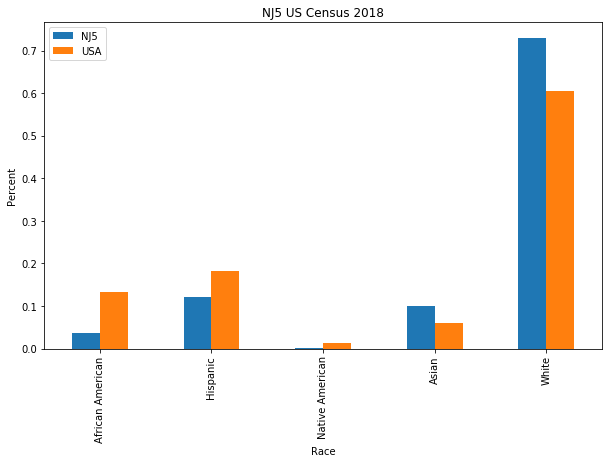

In [91]:
result_ethnic_rename_trans2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Race') # add to x-label to the plot
plt.ylabel('Percent') # add y-label to the plot
plt.title('NJ5 US Census 2018') # add title to the plot
colors
plt.show()

<p1>Okay now we can see NJ5 in blue and the USA in orange.</p1>

<h1>Now time for some KMeans.  I would like to take a closer look at the 49 communities with the detailed US Census data and cluster them</h1>

In [92]:
#I don't want the election results to cloud the results so dropping them
df_nj5_49_demo=df_nj5_49.drop(['Democrat 2016','Democrat 2016 Per Person','Democrat 2014','Democrat 2014 Per Person','Republican 2018','Democrat 2018','Democrat 2018 Per Person','Republican 2018 Per Person','Republican 2016 Per Person','Republican 2016','Republican 2014','Republican 2014 Per Person'],axis=1)

In [93]:
df_nj5_49_demo.shape

(49, 25)

In [94]:
df_nj5_49_demo.set_index('Name',inplace=True)


In [96]:
#df_nj5_main.at['Paramus borough','County']='Bergen County'
df_nj5_49_demo.at['Paramus borough','County']='Bergen County'


In [97]:
#now looking at the smaller dataframe without the extra election results
df_nj5_49_demo

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
Name,,,,,,,,,,,,,,,,,,,,,
Allendale borough,Bergen County,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,...,682100,0.931,0.152,0.720,0.030,0.025,8650.0,37.0,65020,2100.4
Andover township,Bergen County,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,...,278100,0.926,0.101,0.369,0.078,0.043,1873.0,34.5,42654,316.6
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,344500,0.943,0.490,0.422,0.047,0.094,6617.0,33.5,35353,9306.0
Blairstown township,Warren County,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,...,302000,0.936,0.101,0.351,0.075,0.054,13955.0,40.8,38832,193.6
Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,...,316100,0.886,0.470,0.288,0.057,0.125,NaN,31.2,32399,10702.0
Closter borough,Bergen County,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,...,625700,0.914,0.467,0.617,0.040,0.104,12618.0,35.1,56974,2646.3
Dumont borough,Bergen County,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.000,0.180,...,364500,0.937,0.370,0.437,0.039,0.069,4150.0,31.7,41346,8814.4
Emerson borough,Bergen County,7643,0.239,0.183,0.527,0.011,0.000,0.089,0.000,0.131,...,465600,0.931,0.256,0.422,0.085,0.059,17166.0,29.9,39338,3359.5
Fair Lawn borough,Bergen County,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.000,0.137,...,406400,0.910,0.410,0.525,0.051,0.051,14687.0,31.1,45216,6315.8


In [98]:
#we can only do kmeans if all data is numeric
df_nj5_49_final=df_nj5_49_demo.drop(['County'],axis=1)

<p1>Here we have the numberic data for the 49 towns.  Since it is numeric we can use Kmeans</p1>

In [99]:
df_nj5_49_final

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Total retail sales per capita 2012,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
Name,,,,,,,,,,,,,,,,,,,,,
Allendale borough,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,0.833,...,682100,0.931,0.152,0.720,0.030,0.025,8650.0,37.0,65020,2100.4
Andover township,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,0.903,...,278100,0.926,0.101,0.369,0.078,0.043,1873.0,34.5,42654,316.6
Bergenfield borough,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,0.375,...,344500,0.943,0.490,0.422,0.047,0.094,6617.0,33.5,35353,9306.0
Blairstown township,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,0.853,...,302000,0.936,0.101,0.351,0.075,0.054,13955.0,40.8,38832,193.6
Bogota borough,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,0.377,...,316100,0.886,0.470,0.288,0.057,0.125,NaN,31.2,32399,10702.0
Closter borough,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,0.548,...,625700,0.914,0.467,0.617,0.040,0.104,12618.0,35.1,56974,2646.3
Dumont borough,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.000,0.180,0.614,...,364500,0.937,0.370,0.437,0.039,0.069,4150.0,31.7,41346,8814.4
Emerson borough,7643,0.239,0.183,0.527,0.011,0.000,0.089,0.000,0.131,0.764,...,465600,0.931,0.256,0.422,0.085,0.059,17166.0,29.9,39338,3359.5
Fair Lawn borough,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.000,0.137,0.711,...,406400,0.910,0.410,0.525,0.051,0.051,14687.0,31.1,45216,6315.8


In [100]:
#We should make sure the data is numbers only
df_nj5_49_final.dtypes

Population estimates July 1 2018                                                         int64
Persons under 18 years percent                                                         float64
Persons 65 years and over percent                                                      float64
Female persons percent                                                                 float64
Black or African American alone percent                                                float64
American Indian and Alaska Native alone percent                                        float64
Asian alone percent                                                                    float64
Native Hawaiian and Other Pacific Islander alone percent                               float64
Hispanic or Latino percent                                                             float64
White alone not Hispanic or Latino percent                                             float64
Veterans 2017                                     

<p1>Found an issue as one column has some NaN values.  I don't care as much for the column as I do the rows so droping the column here</p1>

In [164]:
#df_nj5_49_finalk=df_nj5_49_final.filter(['Per capita income in past 12 months 2017 in 2017 dollars','Mean travel time to work in minutes workers age 16 years plus 2017','With a disability under age 65 years percent 2017','Persons  without health insurance under age 65 years percent','Bachelor degree or higher percent of persons age 25 years plus 2017','Foreign born persons percent 2017','Female persons percent','Persons under 18 years percent','Persons 65 years and over percent','Black or African American alone percent','Hispanic or Latino percent','American Indian and Alaska Native alone percent','Asian alone percent','White alone not Hispanic or Latino percent'], axis=1)

In [101]:
#drop the nan one column has nan a few times so droping the column not the rows
df_nj5_49_finalk=df_nj5_49_final.drop(['Total retail sales per capita 2012'],axis=1)

In [103]:
df_nj5_49_finalk

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Owner occupied housing unit rate 2017,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010
Name,,,,,,,,,,,,,,,,,,,,,
Allendale borough,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,0.833,...,0.844,682100,0.931,0.152,0.720,0.030,0.025,37.0,65020,2100.4
Andover township,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,0.903,...,0.845,278100,0.926,0.101,0.369,0.078,0.043,34.5,42654,316.6
Bergenfield borough,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,0.375,...,0.672,344500,0.943,0.490,0.422,0.047,0.094,33.5,35353,9306.0
Blairstown township,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,0.853,...,0.871,302000,0.936,0.101,0.351,0.075,0.054,40.8,38832,193.6
Bogota borough,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,0.377,...,0.684,316100,0.886,0.470,0.288,0.057,0.125,31.2,32399,10702.0
Closter borough,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,0.548,...,0.834,625700,0.914,0.467,0.617,0.040,0.104,35.1,56974,2646.3
Dumont borough,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.000,0.180,0.614,...,0.736,364500,0.937,0.370,0.437,0.039,0.069,31.7,41346,8814.4
Emerson borough,7643,0.239,0.183,0.527,0.011,0.000,0.089,0.000,0.131,0.764,...,0.840,465600,0.931,0.256,0.422,0.085,0.059,29.9,39338,3359.5
Fair Lawn borough,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.000,0.137,0.711,...,0.812,406400,0.910,0.410,0.525,0.051,0.051,31.1,45216,6315.8


<p1>Okay here we go with k means.  I like the idea to normalize the data first.  I also played a lot with the number of clusters and decided to go with 4</p1>

In [104]:
from sklearn.preprocessing import StandardScaler
X = df_nj5_49_finalk.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.79135909, -0.5045103 ,  0.66518007, ...,  0.77853084,
         1.08390899, -0.44596708],
       [-0.96499007,  2.03822162, -1.75188999, ...,  0.16403324,
        -0.47854033, -1.05151152],
       [-0.21027542, -0.64577319,  1.1778919 , ..., -0.0817658 ,
        -0.98857531,  2.00010927],
       ...,
       [ 0.11786138, -0.11603737,  1.69060374, ...,  0.40983228,
        -0.21349818,  0.47514755],
       [ 0.61006659, -0.01009021,  0.81166917, ..., -0.18008542,
         2.28868414, -0.58772925],
       [ 0.97101707,  0.80217138,  1.25113645, ..., -0.6962634 ,
         1.51640134, -0.29327402]])

In [105]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels2 = k_means.labels_
print(labels2)

[3 2 2 2 2 3 0 0 0 2 1 3 2 2 2 3 2 0 0 2 0 0 3 0 2 3 0 1 3 3 3 3 1 2 0 3 0
 0 1 2 0 2 2 0 2 2 0 1 1]


<p1>Time to merge the K means cluster results into the dataframe</p1>

In [106]:
df_nj5_49_finalk['k_result']=labels2

In [107]:
df_nj5_49_finalk

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010,k_result
Name,,,,,,,,,,,,,,,,,,,,,
Allendale borough,6792,0.280,0.152,0.521,0.011,0.000,0.117,0.000,0.018,0.833,...,682100,0.931,0.152,0.720,0.030,0.025,37.0,65020,2100.4,3
Andover township,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,0.903,...,278100,0.926,0.101,0.369,0.078,0.043,34.5,42654,316.6,2
Bergenfield borough,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,0.375,...,344500,0.943,0.490,0.422,0.047,0.094,33.5,35353,9306.0,2
Blairstown township,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,0.853,...,302000,0.936,0.101,0.351,0.075,0.054,40.8,38832,193.6,2
Bogota borough,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,0.377,...,316100,0.886,0.470,0.288,0.057,0.125,31.2,32399,10702.0,2
Closter borough,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,0.548,...,625700,0.914,0.467,0.617,0.040,0.104,35.1,56974,2646.3,3
Dumont borough,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.000,0.180,0.614,...,364500,0.937,0.370,0.437,0.039,0.069,31.7,41346,8814.4,0
Emerson borough,7643,0.239,0.183,0.527,0.011,0.000,0.089,0.000,0.131,0.764,...,465600,0.931,0.256,0.422,0.085,0.059,29.9,39338,3359.5,0
Fair Lawn borough,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.000,0.137,0.711,...,406400,0.910,0.410,0.525,0.051,0.051,31.1,45216,6315.8,0


<p1>Now I wanted to look at each k result bucket one at a time to see the patterns myself.  Generally I don't see anything which predicts how a community with vote but it is nice to see them grouped with similar communities</p1>

In [108]:
df_nj5_49_finalk.loc[df_nj5_49_finalk['k_result']==2]

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010,k_result
Name,,,,,,,,,,,,,,,,,,,,,
Andover township,5914,0.196,0.224,0.488,0.031,0.000,0.026,0.000,0.042,0.903,...,278100,0.926,0.101,0.369,0.078,0.043,34.5,42654,316.6,2
Bergenfield borough,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,0.375,...,344500,0.943,0.490,0.422,0.047,0.094,33.5,35353,9306.0,2
Blairstown township,5728,0.219,0.196,0.510,0.009,0.000,0.010,0.000,0.128,0.853,...,302000,0.936,0.101,0.351,0.075,0.054,40.8,38832,193.6,2
Bogota borough,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,0.377,...,316100,0.886,0.470,0.288,0.057,0.125,31.2,32399,10702.0,2
Frankford township,5311,0.184,0.191,0.506,0.004,0.000,0.025,0.000,0.087,0.877,...,315100,0.956,0.094,0.315,0.087,0.059,35.0,39358,163.6,2
Hackensack city,44522,0.184,0.143,0.511,0.253,0.004,0.105,0.000,0.382,0.267,...,292600,0.844,0.484,0.345,0.069,0.167,31.3,32723,10289.5,2
Hackettstown town,9463,0.215,0.146,0.505,0.032,0.001,0.036,0.001,0.208,0.718,...,272600,0.842,0.258,0.324,0.080,0.171,28.2,32374,2695.9,2
Hardyston township,7804,0.203,0.190,0.510,0.018,0.000,0.018,0.000,0.026,0.929,...,257600,0.875,0.077,0.357,0.048,0.039,40.9,42885,256.9,2
Independence township,5444,0.177,0.121,0.511,0.025,0.000,0.023,0.002,0.067,0.868,...,248800,0.892,0.087,0.378,0.042,0.062,34.3,45988,286.8,2


In [109]:
df_nj5_49_finalk_sorted=df_nj5_49_finalk.sort_values(by=['k_result','Name'])

In [110]:
df_nj5_49_finalk_sorted

,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,White alone not Hispanic or Latino percent,...,Median value of owner-occupied housing units 2017,Living in same house 1 year ago percent of persons age 1 year plus 2017,Language other than English spoken at home percent of persons age 5 years plus 2017,Bachelor degree or higher percent of persons age 25 years plus 2017,With a disability under age 65 years percent 2017,Persons without health insurance under age 65 years percent,Mean travel time to work in minutes workers age 16 years plus 2017,Per capita income in past 12 months 2017 in 2017 dollars,Population per square mile 2010,k_result
Name,,,,,,,,,,,,,,,,,,,,,
Dumont borough,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.000,0.180,0.614,...,364500,0.937,0.370,0.437,0.039,0.069,31.7,41346,8814.4,0
Emerson borough,7643,0.239,0.183,0.527,0.011,0.000,0.089,0.000,0.131,0.764,...,465600,0.931,0.256,0.422,0.085,0.059,29.9,39338,3359.5,0
Fair Lawn borough,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.000,0.137,0.711,...,406400,0.910,0.410,0.525,0.051,0.051,31.1,45216,6315.8,0
Lodi borough,24551,0.202,0.134,0.507,0.076,0.006,0.115,0.000,0.360,0.458,...,369800,0.901,0.546,0.223,0.066,0.153,25.8,27919,10656.1,0
Mahwah township,26380,0.187,0.167,0.535,0.033,0.002,0.132,0.001,0.088,0.741,...,489900,0.890,0.228,0.569,0.038,0.064,29.1,50354,1007.7,0
Maywood borough,9694,0.196,0.176,0.537,0.047,0.001,0.156,0.000,0.208,0.565,...,373200,0.935,0.361,0.373,0.067,0.103,26.5,43162,7430.0,0
Midland Park borough,7265,0.238,0.170,0.509,0.008,0.000,0.009,0.000,0.133,0.836,...,488500,0.921,0.095,0.494,0.044,0.068,29.7,47062,4583.9,0
New Milford borough,16558,0.192,0.163,0.507,0.034,0.004,0.180,0.000,0.175,0.597,...,397000,0.912,0.419,0.424,0.044,0.065,32.5,40102,7186.0,0
Oakland borough,13021,0.248,0.145,0.508,0.023,0.002,0.056,0.000,0.070,0.860,...,446800,0.937,0.163,0.495,0.037,0.062,29.1,47755,1508.6,0


<h1>So it is nice to see k means put the communities into buckets with just the US Census data.  What if we leave in the voting results data too?</h1>

In [113]:
#df_nj5_main.head()

New_main=df_nj5_main.sort_values(by=['Republican 2018 Per Person','Name'])
#karl=df_nj5_49_finalk.sort_values(by=['k_result','Name'])

New_main


,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Hackensack city,Bergen County,44522,0.184,0.143,0.511,0.253,0.004,0.105,0.000,0.382,...,10570,0.23741,5179,0.11632,2311,0.05191,2692,0.06046,1660,0.03728
Teaneck township,Bergen County,40619,0.240,0.165,0.512,0.276,0.002,0.085,0.000,0.191,...,10821,0.26640,6305,0.15522,2284,0.05623,3445,0.08481,2328,0.05731
Lodi borough,Bergen County,24551,0.202,0.134,0.507,0.076,0.006,0.115,0.000,0.360,...,4686,0.19087,1879,0.07653,1968,0.08016,2210,0.09002,1197,0.04876
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
Bogota borough,Bergen County,8413,0.211,0.108,0.499,0.106,0.000,0.059,0.000,0.445,...,2184,0.25960,1185,0.14085,851,0.10115,1017,0.12088,853,0.10139
Closter borough,Bergen County,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,...,2174,0.25332,1118,0.13027,1070,0.12468,1379,0.16069,967,0.11268
Demarest,Bergen County,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1460,0.29597,892,0.18082,660,0.13379,874,0.17717,744,0.15082
River Edge borough,Bergen County,11531,0.242,0.132,0.509,0.010,0.004,0.225,0.000,0.113,...,3035,0.26320,1565,0.13572,1543,0.13381,2047,0.17752,1434,0.12436
New Milford borough,Bergen County,16558,0.192,0.163,0.507,0.034,0.004,0.180,0.000,0.175,...,3927,0.23717,1865,0.11263,2294,0.13854,2964,0.17901,2052,0.12393


In [114]:
New_main_Clean = New_main.dropna()

In [115]:
New_main_Clean

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person
Name,,,,,,,,,,,,,,,,,,,,,
Hackensack city,Bergen County,44522,0.184,0.143,0.511,0.253,0.004,0.105,0.000,0.382,...,10570,0.23741,5179,0.11632,2311,0.05191,2692,0.06046,1660,0.03728
Teaneck township,Bergen County,40619,0.240,0.165,0.512,0.276,0.002,0.085,0.000,0.191,...,10821,0.26640,6305,0.15522,2284,0.05623,3445,0.08481,2328,0.05731
Lodi borough,Bergen County,24551,0.202,0.134,0.507,0.076,0.006,0.115,0.000,0.360,...,4686,0.19087,1879,0.07653,1968,0.08016,2210,0.09002,1197,0.04876
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,6807,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315
Closter borough,Bergen County,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,...,2174,0.25332,1118,0.13027,1070,0.12468,1379,0.16069,967,0.11268
River Edge borough,Bergen County,11531,0.242,0.132,0.509,0.010,0.004,0.225,0.000,0.113,...,3035,0.26320,1565,0.13572,1543,0.13381,2047,0.17752,1434,0.12436
New Milford borough,Bergen County,16558,0.192,0.163,0.507,0.034,0.004,0.180,0.000,0.175,...,3927,0.23717,1865,0.11263,2294,0.13854,2964,0.17901,2052,0.12393
Maywood borough,Bergen County,9694,0.196,0.176,0.537,0.047,0.001,0.156,0.000,0.208,...,2480,0.25583,1180,0.12172,1354,0.13967,1566,0.16154,1156,0.11925
Ridgewood village,Bergen County,25272,0.304,0.139,0.517,0.017,0.001,0.148,0.000,0.078,...,7397,0.29270,3839,0.15191,3536,0.13992,4811,0.19037,3292,0.13026


In [116]:
X2 = New_main_Clean.values[:,1:]
X2 = np.nan_to_num(X2)
Clus_dataSet2 = StandardScaler().fit_transform(X2)
Clus_dataSet2

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 3.17009614, -1.33502972, -0.81636796, ..., -2.57925545,
        -0.18772471, -2.65593976],
       [ 2.76542738,  0.44693844,  0.0102473 , ..., -2.19925112,
         0.49854453, -2.18218968],
       [ 1.0994736 , -0.76225424, -1.15452875, ..., -2.11794424,
        -0.66338738, -2.3844145 ],
       ...,
       [-0.63687989, -0.73043338,  0.94958282, ...,  1.26058297,
        -0.47846453,  0.63571271],
       [-0.85212261, -0.22129962,  1.17502335, ...,  1.35406247,
        -0.71783688,  1.18609535],
       [-0.89535779, -1.33502972,  0.98715624, ...,  2.19834314,
        -0.74763001,  1.42781906]])

In [117]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X2)
labels3 = k_means.labels_
print(labels3)

[0 3 3 3 2 2 3 3 1 0 3 3 2 0 3 0 0 3 2 3 2 2 2 0 1 2 2 3 3 0 2 0 2 3 0 1 1
 1 1 0 0 0 0 0]


In [118]:
New_main_Clean['k_result']=labels3

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
New_main_Clean

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person,k_result
Name,,,,,,,,,,,,,,,,,,,,,
Hackensack city,Bergen County,44522,0.184,0.143,0.511,0.253,0.004,0.105,0.000,0.382,...,0.23741,5179,0.11632,2311,0.05191,2692,0.06046,1660,0.03728,0
Teaneck township,Bergen County,40619,0.240,0.165,0.512,0.276,0.002,0.085,0.000,0.191,...,0.26640,6305,0.15522,2284,0.05623,3445,0.08481,2328,0.05731,3
Lodi borough,Bergen County,24551,0.202,0.134,0.507,0.076,0.006,0.115,0.000,0.360,...,0.19087,1879,0.07653,1968,0.08016,2210,0.09002,1197,0.04876,3
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.000,0.263,...,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315,3
Closter borough,Bergen County,8582,0.251,0.153,0.506,0.039,0.000,0.360,0.000,0.074,...,0.25332,1118,0.13027,1070,0.12468,1379,0.16069,967,0.11268,2
River Edge borough,Bergen County,11531,0.242,0.132,0.509,0.010,0.004,0.225,0.000,0.113,...,0.26320,1565,0.13572,1543,0.13381,2047,0.17752,1434,0.12436,2
New Milford borough,Bergen County,16558,0.192,0.163,0.507,0.034,0.004,0.180,0.000,0.175,...,0.23717,1865,0.11263,2294,0.13854,2964,0.17901,2052,0.12393,3
Maywood borough,Bergen County,9694,0.196,0.176,0.537,0.047,0.001,0.156,0.000,0.208,...,0.25583,1180,0.12172,1354,0.13967,1566,0.16154,1156,0.11925,3
Ridgewood village,Bergen County,25272,0.304,0.139,0.517,0.017,0.001,0.148,0.000,0.078,...,0.29270,3839,0.15191,3536,0.13992,4811,0.19037,3292,0.13026,1


In [120]:
New_main_Clean.loc[New_main_Clean['k_result']==3]

,County,Population estimates July 1 2018,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,Hispanic or Latino percent,...,Democrat 2016 Per Person,Democrat 2014,Democrat 2014 Per Person,Republican 2018,Republican 2018 Per Person,Republican 2016,Republican 2016 Per Person,Republican 2014,Republican 2014 Per Person,k_result
Name,,,,,,,,,,,,,,,,,,,,,
Teaneck township,Bergen County,40619,0.240,0.165,0.512,0.276,0.002,0.085,0.0,0.191,...,0.26640,6305,0.15522,2284,0.05623,3445,0.08481,2328,0.05731,3
Lodi borough,Bergen County,24551,0.202,0.134,0.507,0.076,0.006,0.115,0.0,0.360,...,0.19087,1879,0.07653,1968,0.08016,2210,0.09002,1197,0.04876,3
Bergenfield borough,Bergen County,27479,0.219,0.148,0.528,0.079,0.001,0.284,0.0,0.263,...,0.24772,2914,0.10604,2524,0.09185,3211,0.11685,2285,0.08315,3
New Milford borough,Bergen County,16558,0.192,0.163,0.507,0.034,0.004,0.180,0.0,0.175,...,0.23717,1865,0.11263,2294,0.13854,2964,0.17901,2052,0.12393,3
Maywood borough,Bergen County,9694,0.196,0.176,0.537,0.047,0.001,0.156,0.0,0.208,...,0.25583,1180,0.12172,1354,0.13967,1566,0.16154,1156,0.11925,3
Dumont borough,Bergen County,17697,0.214,0.171,0.520,0.051,0.002,0.166,0.0,0.180,...,0.25733,1988,0.11234,2525,0.14268,3142,0.17754,2278,0.12872,3
Fair Lawn borough,Bergen County,33128,0.218,0.162,0.525,0.016,0.001,0.133,0.0,0.137,...,0.26968,4440,0.13403,4731,0.14281,5818,0.17562,3826,0.11549,3
Rochelle Park township,Bergen County,5614,0.185,0.215,0.535,0.014,0.002,0.120,0.0,0.234,...,0.22729,497,0.08853,900,0.16031,1054,0.18774,710,0.12647,3
Westwood borough,Bergen County,11155,0.229,0.163,0.535,0.069,0.000,0.088,0.0,0.166,...,0.26114,1302,0.11672,1928,0.17284,2214,0.19848,1429,0.12810,3


<p1>Okay so I don't see a clear pattern which I can use to predict if someone will vote Democrat or Republican using k means just yet.  I think I should keep trying maybe by looking at removing some data.  For example just clustering by say income per capita only or Persons 65 and over to see if just using less data will result in better clusters.</p1>

<h1>Now that we have clusterd based on US Census data and New Jersey state voting results maybe we can do something easier/better/quicker/more applicable outside of NJ5.  The Foursquare data might help</h1>

In [121]:
#pull in the lat and long data for the 79 communities in nj5
body = client_69a90b0368484683a96fb7f5d0b8eed7.get_object(Bucket='datasciencecapstoneprojectcourse9-donotdelete-pr-ubqbzttbbqeol7',Key='latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

latlong = pd.read_csv(body)
latlong.head()


,Name,lat,long
0,Allamuchy Twp,40.920033,-74.819759
1,Allendale borough,41.032669,-74.133826
2,Alpine,40.968149,-73.917150
3,Andover Boro,40.985758,-74.743590
4,Andover township,41.030051,-74.727124


In [122]:
#foursquare stuff
CLIENT_ID = 'YGXW0I5INWTAJNCYXPO3DPW4FF3WKF1QR44RC0M30KRYEWJV' 
CLIENT_SECRET = 'ZPPGN2PEBDDZH5C1TOPHIPDSG4MVDFT44X1X5SOROI2QFJOK'
VERSION = '20180605' # API version

In [123]:
LIMIT = 100
radius = 500

In [124]:
#need beautifulsoup and requests modules to make restful api calls to foursquare
from bs4 import BeautifulSoup
import requests

<p1>I would like to test the foursquare api on one thing before trying to call all the data</p1>

In [125]:
lat=41.032669
lng=-74.133826

In [126]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url   

'https://api.foursquare.com/v2/venues/explore?&client_id=YGXW0I5INWTAJNCYXPO3DPW4FF3WKF1QR44RC0M30KRYEWJV&client_secret=ZPPGN2PEBDDZH5C1TOPHIPDSG4MVDFT44X1X5SOROI2QFJOK&v=20180605&ll=41.032669,-74.133826&radius=500&limit=100'

In [127]:

results = requests.get(url).json()

In [128]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [129]:
venues = results['response']['groups'][0]['items']

In [130]:
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b81dc70f964a5209bc130e3-0,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",4b81dc70f964a5209bc130e3,81 W Allendale Ave,US,Allendale,United States,NaN,482,"[81 W Allendale Ave, Allendale, NJ 07401, Unit...","[{'label': 'display', 'lat': 41.03054358909596...",41.030544,-74.128819,07401,NJ,Masa Sushi & Grill,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-531d05af498e8df8b1f64604-1,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",531d05af498e8df8b1f64604,95 W Allendale Ave,US,Allendale,United States,NaN,459,"[95 W Allendale Ave, Allendale, NJ 07401, Unit...","[{'label': 'display', 'lat': 41.03024017021795...",41.030240,-74.129403,07401,NJ,Allendale Steak House,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c1e4b288b3aa59310d29b5f-2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",4c1e4b288b3aa59310d29b5f,95 W Allendale Ave,US,Allendale,United States,NaN,437,"[95 W Allendale Ave, Allendale, NJ 07401, Unit...","[{'label': 'display', 'lat': 41.03074179958851...",41.030742,-74.129287,07401,NJ,Mezza Luna Bistro Ristorante,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bf81493b182c9b65bcc765a-3,"[{'id': '4bf58dd8d48988d161941735', 'name': 'L...",4bf81493b182c9b65bcc765a,NaN,US,Allendale,United States,NaN,297,"[Allendale, NJ, United States]","[{'label': 'display', 'lat': 41.03413911528538...",41.034139,-74.136781,NaN,NJ,Crestwood Park,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ba7fffef964a52043c539e3-4,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",4ba7fffef964a52043c539e3,W Allendale St,US,Allendale,United States,NaN,326,"[W Allendale St, Allendale, NJ 07401, United S...","[{'label': 'display', 'lat': 41.03077646918118...",41.030776,-74.130850,07401,NJ,NJT - Allendale Station (MBPJ),0,[]
5,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ccc8f162dc437040d70c808-5,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",4ccc8f162dc437040d70c808,240 W Crescent Ave,US,Allendale,United States,Myrtle Ave,342,"[240 W Crescent Ave (Myrtle Ave), Allendale, N...","[{'label': 'display', 'lat': 41.03574832017642...",41.035748,-74.133728,07401,NJ,Holmgren's Blackbelt Academy,0,[]
6,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b5b7efbf964a520880229e3-6,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",4b5b7efbf964a520880229e3,1 Myrtle Ave,US,Allendale,United States,NaN,383,"[1 Myrtle Ave, Allendale, NJ 07401, United Sta...","[{'label': 'display', 'lat': 41.030862, 'lng':...",41.030862,-74.129938,07401,NJ,pastafino,0,[]
7,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5a611db835f98307b947def4-7,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",5a611db835f98307b947def4,NaN,US,Allendale,United States,NaN,389,"[Allendale, NJ 07401, United States]","[{'label': 'display', 'lat': 41.030529, 'lng':...",41.030529,-74.130152,07401,NJ,Fino,0,[]
8,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5bf41ca067f62b002ce4837e-8,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",5bf41ca067f62b002ce4837e,NaN,US,Allendale,United States,NaN,426,"[Allendale, NJ, United States]","[{'label': 'display', 'lat': 41.030505, 'lng':...",41.030505,-74.129637,NaN,NJ,Allendale Corner Cafe,0,[]


In [131]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Masa Sushi & Grill,Sushi Restaurant,41.030544,-74.128819
1,Allendale Steak House,Steakhouse,41.030240,-74.129403
2,Mezza Luna Bistro Ristorante,Italian Restaurant,41.030742,-74.129287
3,Crestwood Park,Lake,41.034139,-74.136781
4,NJT - Allendale Station (MBPJ),Train Station,41.030776,-74.130850


In [132]:
print('For Allendale {} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

For Allendale 9 venues were returned by Foursquare.


<p1>Worked great for Allendale.  Now let us run it for all 79</p1>

In [133]:
LIMIT = 300
radius = 1000

In [134]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [135]:
nj5_venues = getNearbyVenues(names=latlong['Name'],
                                   latitudes=latlong['lat'],
                                   longitudes=latlong['long']
                                  )

Allamuchy Twp
Allendale borough
Alpine
Andover  Boro
Andover township
Belvidere
Bergenfield borough
Blairstown township
Bogota borough
Branchville
Closter borough
Demarest
Dumont borough
Emerson borough
Fair Lawn borough
Frankford township
Franklin
Franklin Lakes borough
Fredon Twp
Frelinghuysen
Glen Rock borough
Green Twp
Hackensack city
Hackettstown town
Hamburg
Hampton Twp
Hardwick
Hardyston township
Harrington Park
Haworth
Hillsdale borough
Ho-Ho-Kus
Hope
Independence township
Knowlton
Lafayette Twp
Liberty
Lodi borough
Mahwah township
Mansfield township
Maywood borough
Midland Park borough
Montague Twp
Montvale borough
New Milford borough
Newton town
Northvale
Norwood borough
Oakland borough
Old Tappan borough
Oradell borough
Oxford
Paramus borough
Park Ridge borough
Ramsey borough
Ridgewood village
Ringwood borough
River Edge borough
River Vale township
Rochelle Park township
Rockleigh
Saddle River
Sandyston Twp
Stillwater Twp
Sussex
Teaneck township
Upper Saddle River borough
Ve

<p1>How did we do.  Below shows things look good.</p1>

In [136]:
nj5_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allamuchy Twp,40.920033,-74.819759,Quinby Mountain Hunting Club,40.918110,-74.820695,Sports Club
1,Allamuchy Twp,40.920033,-74.819759,Allamuchy Gun Club,40.921930,-74.823260,Sports Club
2,Allendale borough,41.032669,-74.133826,Masa Sushi & Grill,41.030544,-74.128819,Sushi Restaurant
3,Allendale borough,41.032669,-74.133826,Allendale Steak House,41.030240,-74.129403,Steakhouse
4,Allendale borough,41.032669,-74.133826,Mezza Luna Bistro Ristorante,41.030742,-74.129287,Italian Restaurant
5,Allendale borough,41.032669,-74.133826,Crestwood Park,41.034139,-74.136781,Lake
6,Allendale borough,41.032669,-74.133826,NJT - Allendale Station (MBPJ),41.030776,-74.130850,Train Station
7,Allendale borough,41.032669,-74.133826,Holmgren's Blackbelt Academy,41.035748,-74.133728,Martial Arts Dojo
8,Allendale borough,41.032669,-74.133826,pastafino,41.030862,-74.129938,Italian Restaurant
9,Allendale borough,41.032669,-74.133826,Fino,41.030529,-74.130152,Restaurant


In [137]:
print('There are {} uniques categories.'.format(len(nj5_venues['Venue Category'].unique())))

There are 170 uniques categories.


<h1>Now that we have the data from Foursquare we need to get it ready to run K Means and run K Means.  We need one hot encoding to change strings to numbers</h1>

In [138]:
# one hot encoding
nj5_venues_onehot = pd.get_dummies(nj5_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nj5_venues_onehot['Neighborhood'] = nj5_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nj5_venues_onehot.columns[-1]] + list(nj5_venues_onehot.columns[:-1])
nj5_venues_onehot = nj5_venues_onehot[fixed_columns]

nj5_venues_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Women's Store,Yoga Studio
0,Allamuchy Twp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allamuchy Twp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allendale borough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allendale borough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allendale borough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
nj5_venues_onehot.shape

(684, 171)

In [140]:
#we should group the data so it is easier to review
nj5_grouped = nj5_venues_onehot.groupby('Neighborhood').mean().reset_index()
nj5_grouped

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Women's Store,Yoga Studio
0,Allamuchy Twp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Allendale borough,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Alpine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Andover Boro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Andover township,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,Belvidere,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Bergenfield borough,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Blairstown township,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Bogota borough,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Branchville,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.00


In [141]:
#we could look at the top venues in each community
num_top_venues = 5

for hood in nj5_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nj5_grouped[nj5_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allamuchy Twp----
                   venue  freq
0            Sports Club   1.0
1    American Restaurant   0.0
2               Pharmacy   0.0
3           Optical Shop   0.0
4  Outdoors & Recreation   0.0


----Allendale borough----
                venue  freq
0  Italian Restaurant  0.22
1                Lake  0.11
2   Martial Arts Dojo  0.11
3          Steakhouse  0.11
4      Breakfast Spot  0.11


----Alpine----
                   venue  freq
0         Scenic Lookout   1.0
1    American Restaurant   0.0
2            Pizza Place   0.0
3           Optical Shop   0.0
4  Outdoors & Recreation   0.0


----Andover  Boro----
                    venue  freq
0                    Café  0.15
1  Thrift / Vintage Store  0.15
2                   Hotel  0.15
3      Italian Restaurant  0.08
4             Music Venue  0.08


----Andover township----
                 venue  freq
0                 Park   1.0
1  American Restaurant   0.0
2             Pharmacy   0.0
3         Noodle House   0.0
4    

In [144]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [145]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nj5_grouped['Neighborhood']

for ind in np.arange(nj5_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nj5_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allamuchy Twp,Sports Club,Yoga Studio,Dry Cleaner,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant,Electronics Store
1,Allendale borough,Italian Restaurant,Restaurant,Sushi Restaurant,Lake,Breakfast Spot,Train Station,Steakhouse,Martial Arts Dojo,Electronics Store,Filipino Restaurant
2,Alpine,Scenic Lookout,Yoga Studio,Donut Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant,Electronics Store
3,Andover Boro,Café,Hotel,Thrift / Vintage Store,Print Shop,Tunnel,Bed & Breakfast,Baseball Field,Music Venue,Pizza Place,Italian Restaurant
4,Andover township,Park,Yoga Studio,Electronics Store,Flower Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant


<h1>K means on the Foursquare data</h1>

In [146]:

# set number of clusters
kclusters = 4

nj5_grouped_clustering = nj5_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nj5_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [147]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nj5_merged = latlong


In [148]:
neighborhoods_venues_sorted.shape

(58, 12)

In [149]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Allamuchy Twp,Sports Club,Yoga Studio,Dry Cleaner,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant,Electronics Store
1,0,Allendale borough,Italian Restaurant,Restaurant,Sushi Restaurant,Lake,Breakfast Spot,Train Station,Steakhouse,Martial Arts Dojo,Electronics Store,Filipino Restaurant
2,1,Alpine,Scenic Lookout,Yoga Studio,Donut Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant,Electronics Store
3,0,Andover Boro,Café,Hotel,Thrift / Vintage Store,Print Shop,Tunnel,Bed & Breakfast,Baseball Field,Music Venue,Pizza Place,Italian Restaurant
4,3,Andover township,Park,Yoga Studio,Electronics Store,Flower Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant
5,0,Belvidere,Park,American Restaurant,Bank,Chinese Restaurant,Burger Joint,Gas Station,Breakfast Spot,Deli / Bodega,Historic Site,Hobby Shop
6,0,Bergenfield borough,Asian Restaurant,Japanese Restaurant,Bus Stop,Mexican Restaurant,Movie Theater,Empanada Restaurant,Donut Shop,Pizza Place,Restaurant,Sandwich Place
7,0,Blairstown township,Pharmacy,Flower Shop,Supermarket,Café,Pizza Place,Chinese Restaurant,Electronics Store,Field,Fast Food Restaurant,Farmers Market
8,0,Bogota borough,Convenience Store,Liquor Store,Pizza Place,Bank,Bakery,Café,Bar,Breakfast Spot,Pharmacy,Latin American Restaurant
9,0,Branchville,Bar,Diner,American Restaurant,Outdoors & Recreation,Pharmacy,Bookstore,Baseball Field,Trail,Italian Restaurant,Wine Shop


<p1>So we can see a lot of interesting things.  There are a lot of Italian Restaurants for example.  Interesting evidience to a large Italian population in Northern New Jersey.  There is a surprising number of Filipino restaurants in a few towns.  Some towns have a lot of farms and farmers markets.  Some towns show more Convenience and liquor stores. A few towns appear to have multiple train stations. We can learn a lot here</p1>

In [150]:
#playing around with filtering by the clusters to see any paterns
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels']==2]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,2,Woodcliff Lake borough,Garden Center,Electronics Store,Fondue Restaurant,Flower Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Empanada Restaurant


<h1>Conclusions</h1>

<ol>
    <li>New Jersey Congressional District 5 has multiple counties.  By far the biggest is Bergen County</li>
    <li>The data shows the Democratic party is dominant in Bergen County however Bergen County is suburban and well off (which is often assumed to be a Republican stronghold)</li>
    <li>K means clusting is helpful to place similar communities together.  At the same time I don't see any clear way of running k means to bucket communities into Democrat or Republican</li>
    <li>In the end this exercise is helpful for anyone interested in running for office in NJ5.  By taking a close look at the data from the US Census we can see which are the biggest towns, the economic state of the people in each community, ethnic groups, and have a view point on culture thanks to Foursquare</li>
</ol>